In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [2]:
sys.path.append("../modules/")

In [3]:
import ContentRecommender
import CollaborativeRecommender

In [4]:
import UserStreamViews
import CombinedRecommender

In [5]:
user_views_per_stream_df = pd.read_csv("data/user_views_per_stream.csv", header=0)
user_views_per_stream_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card
0,245,163,1029,Wednesday,Afternoon,15,68.600000
1,245,167,258,Thursday,Afternoon,14,18.428571
2,245,171,123,Wednesday,Afternoon,6,20.500000
3,245,172,83,Wednesday,Afternoon,4,20.750000
4,245,173,167,Monday,Afternoon,8,20.875000


In [6]:
unique_users = np.unique(user_views_per_stream_df["USERID"].values)
unique_users.shape

(219,)

In [7]:
stream_views_raw_df = pd.read_csv("data/content_views_raw.csv", header=0)
stream_views_raw_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,TIMESTAMP,MODULEID,MODULENAME
0,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
1,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
2,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
3,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?
4,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?


In [8]:
stream_views_raw_df['TIMESTAMP'] = pd.to_datetime(stream_views_raw_df['TIMESTAMP'], format="%d-%m-%Y %H:%M")


In [9]:
NUM_USERS = 10
selected_users = np.random.choice(unique_users, NUM_USERS, False)


## Content recommendations for each of the users

In [10]:
content_recommended_streams = []
all_user_viewed_streams = []

for userid in selected_users:
    recent_viewed_streams = UserStreamViews.get_latest_streams_for_user(stream_views_raw_df, userid)
    recent_viewed_stream_ids = [x[0] for x in recent_viewed_streams]
    similar_streams_based_on_history = ContentRecommender.get_similar_streams_based_on_history(recent_viewed_stream_ids)
    if similar_streams_based_on_history is not None:
        recommended_stream_ids = [s[0] for s in similar_streams_based_on_history]
        content_recommended_streams.extend(recommended_stream_ids)
    
    current_user_viewed_streams = user_views_per_stream_df[user_views_per_stream_df["USERID"] == userid]["STREAMID"].values
    all_user_viewed_streams.extend(current_user_viewed_streams)
    
content_recommended_streams = set(content_recommended_streams)
all_user_viewed_streams = set(all_user_viewed_streams)

print("Recommendations")
print(content_recommended_streams)
print(all_user_viewed_streams)

recommended_content_viewed = content_recommended_streams.intersection(all_user_viewed_streams)
len(recommended_content_viewed) / len(content_recommended_streams)

Recommendations
{2433, 2062, 548, 2103, 2104, 1347, 2373, 2374, 199, 202, 2380, 2381, 2511, 2392, 2265, 1498, 2266, 1499, 2401, 2405, 230, 232, 1128, 1512, 364, 1644, 2030, 2031, 624, 623, 2036, 245, 246, 634, 2037, 1658, 1659}
{517, 1655, 1528, 414, 1058, 237, 556, 557, 238, 558, 560, 561, 562, 179, 820, 439, 189, 318, 191, 578, 199, 201, 202, 203, 204, 205, 206, 1644, 218, 219, 220, 247, 248, 1633, 610, 228, 229, 230, 1381, 231, 233, 232, 363, 492, 493, 494, 236, 496, 497, 498, 499, 500, 629, 245, 246, 244, 505, 637}


0.1891891891891892

In [13]:
def get_content_recommendation_performance(users, num_recommendations = 10):
    content_recommended_streams = []
    all_user_viewed_streams = []

    for userid in users:
        recent_viewed_streams = UserStreamViews.get_latest_streams_for_user(stream_views_raw_df, userid)
        recent_viewed_stream_ids = [x[0] for x in recent_viewed_streams]
        similar_streams_based_on_history = ContentRecommender.get_similar_streams_based_on_history(recent_viewed_stream_ids, max_similar_streams = num_recommendations)
        if similar_streams_based_on_history is not None:
            recommended_stream_ids = [s[0] for s in similar_streams_based_on_history]
            content_recommended_streams.extend(recommended_stream_ids)

        current_user_viewed_streams = user_views_per_stream_df[user_views_per_stream_df["USERID"] == userid]["STREAMID"].values
        all_user_viewed_streams.extend(current_user_viewed_streams)
    
    content_recommended_streams = set(content_recommended_streams)
    all_user_viewed_streams = set(all_user_viewed_streams)

    print("Recommendations")
    #print(content_recommended_streams)
    #print(all_user_viewed_streams)

    recommended_content_viewed = content_recommended_streams.intersection(all_user_viewed_streams)
    recommended_content_viewed_ratio = len(recommended_content_viewed) / len(content_recommended_streams)
    return recommended_content_viewed_ratio

In [16]:
content_reco_perfs = []
for itr in [10, 15, 20, 25, 30]:
    content_reco_perf = 0
    for jtr in range(10):
        selected_users = np.random.choice(unique_users, 20, False)
        content_reco_perf += get_content_recommendation_performance(selected_users, itr)
        
    content_reco_perfs.append((itr, content_reco_perf/10))

Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations
Recommendations


In [17]:
content_reco_perfs

[(10, 0.26492892370400895),
 (15, 0.2995726496707568),
 (20, 0.2718310451920161),
 (25, 0.29199657214717456),
 (30, 0.3252277109795395)]

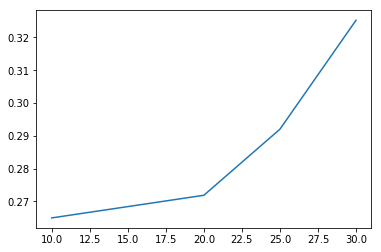

In [20]:
x = [content_reco_perf[0] for content_reco_perf in content_reco_perfs if content_reco_perf[0] != 15]
y = [content_reco_perf[1] for content_reco_perf in content_reco_perfs if content_reco_perf[0] != 15]

plt.plot(x, y)

## Collaborative recommendations for the users

In [30]:
def get_collaborative_recommendation_performance(users, num_recommendations = 10):
    collaborative_recommended_streams = []
    all_user_viewed_streams = []

    for userid in users:
        streams_based_on_other_users = CollaborativeRecommender.get_similar_streams_based_on_other_users(userid, max_similar_streams = num_recommendations)
        # print(streams_based_on_other_users)
        if streams_based_on_other_users is not None:
            recommended_stream_ids = [int(s[0]) for s in streams_based_on_other_users]
            collaborative_recommended_streams.extend(recommended_stream_ids)

        current_user_viewed_streams = user_views_per_stream_df[user_views_per_stream_df["USERID"] == userid]["STREAMID"].values
        all_user_viewed_streams.extend(current_user_viewed_streams)
    
    collaborative_recommended_streams = set(collaborative_recommended_streams)
    all_user_viewed_streams = set(all_user_viewed_streams)

    # print("Recommendations")
    #print(content_recommended_streams)
    #print(all_user_viewed_streams)

    recommended_content_viewed = collaborative_recommended_streams.intersection(all_user_viewed_streams)
    recommended_content_viewed_ratio = len(recommended_content_viewed) / len(collaborative_recommended_streams)
    return recommended_content_viewed_ratio

In [31]:
collaborative_reco_perfs = []
for itr in [10, 15, 20, 25, 30]:
    collaborative_reco_perf = 0
    for jtr in range(10):
        selected_users = np.random.choice(unique_users, 20, False)
        collaborative_reco_perf += get_collaborative_recommendation_performance(selected_users, itr)
        
    collaborative_reco_perfs.append((itr, collaborative_reco_perf/10))

In [32]:
collaborative_reco_perfs

[(10, 0.9199626692751692),
 (15, 0.889498290821817),
 (20, 0.8724489576641016),
 (25, 0.8687595535335106),
 (30, 0.811105465789403)]

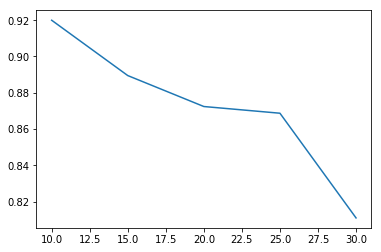

In [33]:
x = [collaborative_reco_perf[0] for collaborative_reco_perf in collaborative_reco_perfs]
y = [collaborative_reco_perf[1] for collaborative_reco_perf in collaborative_reco_perfs]

plt.plot(x, y)

In [34]:
get_collaborative_recommendation_performance([1007], 30)

0.25

## Hybrid recommender performance

In [35]:
def get_hybrid_recommendation_performance(users, num_recommendations = 10):
    hybrid_recommended_streams = []
    all_user_viewed_streams = []

    for userid in users:
        recent_viewed_streams = UserStreamViews.get_latest_streams_for_user(stream_views_raw_df, userid)
        recent_viewed_stream_ids = [x[0] for x in recent_viewed_streams]
        recommended_stream_ids, selection_reasoning = CombinedRecommender.get_recommended_stream_ids(userid, recent_viewed_stream_ids, max_num_streams_required = num_recommendations)
        
        if recommended_stream_ids is not None:
            recommended_stream_ids = [int(s[0]) for s in recommended_stream_ids]
            hybrid_recommended_streams.extend(recommended_stream_ids)

        current_user_viewed_streams = user_views_per_stream_df[user_views_per_stream_df["USERID"] == userid]["STREAMID"].values
        all_user_viewed_streams.extend(current_user_viewed_streams)
    
    hybrid_recommended_streams = set(hybrid_recommended_streams)
    all_user_viewed_streams = set(all_user_viewed_streams)

    # print("Recommendations")
    #print(content_recommended_streams)
    #print(all_user_viewed_streams)

    recommended_content_viewed = hybrid_recommended_streams.intersection(all_user_viewed_streams)
    recommended_content_viewed_ratio = len(recommended_content_viewed) / len(hybrid_recommended_streams)
    return recommended_content_viewed_ratio

In [36]:
hybrid_reco_perfs = []
for itr in [10, 15, 20, 25, 30]:
    hybrid_reco_perf = 0
    for jtr in range(10):
        selected_users = np.random.choice(unique_users, 20, False)
        hybrid_reco_perf += get_collaborative_recommendation_performance(selected_users, itr)
        
    hybrid_reco_perfs.append((itr, hybrid_reco_perf/10))

In [37]:
hybrid_reco_perfs

[(10, 0.9359911555242967),
 (15, 0.9151783864454727),
 (20, 0.8513585695353015),
 (25, 0.8449923203200974),
 (30, 0.8588384921082834)]

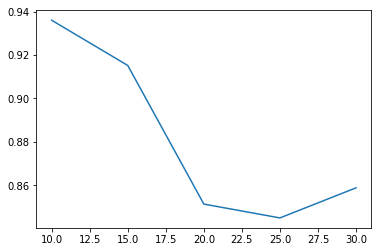

In [38]:
x = [hybrid_reco_perf[0] for hybrid_reco_perf in hybrid_reco_perfs]
y = [hybrid_reco_perf[1] for hybrid_reco_perf in hybrid_reco_perfs]

plt.plot(x, y)